In [ ]:
install.packages("twitteR")

In [ ]:
install.packages("ROAuth")

In [ ]:
install.packages("stringr")

In [ ]:
install.packages("tm")

In [ ]:
install.packages("wordcloud")

In [1]:
library(twitteR)
library(ROAuth)
library(stringr)
library(tm)
library(wordcloud)

Loading required package: NLP
Loading required package: RColorBrewer


In [ ]:
credentials <- list("consumerKey"="kIfyYdxTpAdn201jTngWDG06E", "consumerSecret"="PGELl3ticAMTOMtZm2qbpF2EK8jpp1vnRLIA8P53V8Ctp99sUx", "oauthKey"="500966533-Ojcp3bcWdtXZiG8eGR5N1Y3514eZCTcKsaFVT3pv", "oauthSecret"="38jdrYT2eSefS5GrU4q6sw8oJiYmQ5FkProK7abMdUzIK")

In [ ]:
setup_twitter_oauth(credentials$consumerKey, credentials$consumerSecret, credentials$oauthKey, credentials$oauthSecret)

In [ ]:
screenName <- c('AndrewYNg', 'DARRENHARDY')

In [ ]:
checkHandles <- lookupUsers(screenName)

In [ ]:
UserData <- lapply(checkHandles, function(x) getUser(x))

In [ ]:
UserData <- twListToDF(UserData)

In [ ]:
table(UserData$name, UserData$statusesCount)

In [ ]:
table(UserData$name, UserData$protected)

In [ ]:
usernames <- subset(UserData, protected=FALSE)

In [ ]:
usernames <- as.list(usernames$screenName)

In [ ]:
x <- userTimeline('AndrewYNg', n=3200, includeRts=FALSE)

In [ ]:
NgData <- twListToDF(x)

In [ ]:
Sys.sleep(300)

In [ ]:
x <- userTimeline("DARRENHARDY", n=3200, includeRts=FALSE)

In [ ]:
HardyData <- twListToDF(x)

In [ ]:
Ng.df <- data.frame(NgData)
Hardy.df <- data.frame(HardyData)

In [ ]:
tweets <- data.frame()
tweets <- Ng.df
tweets <- rbind(tweets,Hardy.df)

In [ ]:
#Convert tweets to ASCII
iconv(tweets$text, from="UTF-8", to="ASCII", sub="")

In [ ]:
#Remove graphic characters
tweets$text=str_replace_all(tweets$text,"[^[:graph:]]", " ")

In [ ]:
#Remove junk values and replacement words
#tweets$text <- gsub("[^[:alnum:]///']", "", tweets$text)

In [ ]:
#Convert to lower case
tweets$text <- tolower(tweets$text)

In [ ]:
#Remove retweet keyword
tweets$text <- gsub("rt", "", tweets$text)

In [ ]:
#Remove punctuations
tweets$text <- gsub("[[:punct:]]", "", tweets$text)

In [ ]:
#Remove links
tweets$text <- gsub("http\\w+", "", tweets$text)

In [ ]:
#Remove secure links
tweets$text <- gsub("https\\w+", "", tweets$text)

In [ ]:
#Remove tabs
tweets$text <- gsub("[ \\t]{2,}", "", tweets$text)

In [ ]:
#Remove blank spaces at begining
tweets$text <- gsub("^ ", "", tweets$text)

In [ ]:
#Remove blank spaces at the end
tweets$text <- gsub(" $", "", tweets$text)

In [ ]:
#Remove usernames
tweets$text <- gsub("@\\w+", "", tweets$text)

In [ ]:
library(plyr)

In [ ]:
setwd('/Users/rj/Desktop/opinion-lexicon-English')

In [ ]:
neg = scan('negative-words.txt', what='character', comment.char=';')
neg = c(neg, 'wtf')

In [ ]:
pos = scan('positive-words.txt', what='character', comment.char=';')

In [ ]:
Ng <- subset(tweets, screenName=='AndrewYNg', select=text)
Hardy <- subset(tweets, screenName=='DARRENHARDY', select=text)

In [ ]:
word.list.Ng = str_split(Ng$text[7], '\\s+')
Ng$text[7]

In [ ]:
words.Ng = unlist(word.list.Ng)

In [ ]:
pos.matches.Ng = sum(!is.na(match(words.Ng, pos)))

In [ ]:
pos.matches.Ng

In [ ]:
neg.matches.Ng = sum(!is.na(match(words.Ng, neg)))

In [ ]:
neg.matches.Ng

In [ ]:
Ng <- Corpus(VectorSource(Ng))
Hardy <- Corpus(VectorSource(Hardy))

In [ ]:
Ng <- tm_map(Ng, removeWords, stopwords("en"))
Hardy <- tm_map(Hardy, removeWords, stopwords("en"))

In [ ]:
wordcloud(Ng, min.freq=3, scale=c(6,0.5), colors=brewer.pal(8, "Dark2"),random.color=FALSE, random.order=FALSE, max.words=110)

In [ ]:
wordcloud(Hardy, min.freq=3, scale=c(5,0.5), colors=brewer.pal(9, "Blues"),random.color=FALSE, random.order=FALSE, max.words=110)

In [ ]:
print(NgData)

In [ ]:
NgData$sentiment <- NA

In [ ]:
NgData$sentiment[7] = pos.matches.Ng - neg.matches.Ng

In [ ]:
print(NgData)

In [51]:
l <- readLines('Desktop/card.txt')

In [52]:
print(l)

[1] "I am very thankful that you have chosen me as one the recipients for your award.  As mentioned before, my family and I, are making great efforts for me to continue my education, and we appreciate your contribution to this effort. "                                                                                                                                                                                                                                                             
[2] "I am currently in third semester.   I am very proud to say that I have done very well in the clinical setting.  My instructor has given me very good evaluations.  My goal is to shine in the clinical setting because that is were I will be working once I graduate from the program.  My instructor advice me to see the clinical experience as a \xd2job interview,\xd3 and I can only be thankful for the advices, teachings, and opinions of the ones who have more experience that I do."    
[3] "In a year, when

In [53]:
words <- data.frame(text=l)

In [54]:
words$text

[1] I am very thankful that you have chosen me as one the recipients for your award.  As mentioned before, my family and I, are making great efforts for me to continue my education, and we appreciate your contribution to this effort.                                                                                                                                                                                                                                                              
[2] I am currently in third semester.   I am very proud to say that I have done very well in the clinical setting.  My instructor has given me very good evaluations.  My goal is to shine in the clinical setting because that is were I will be working once I graduate from the program.  My instructor advice me to see the clinical experience as a \xd2job interview,\xd3 and I can only be thankful for the advices, teachings, and opinions of the ones who have more experience that I do.    
[3] In a year, when I am

In [55]:
#Convert tweets to ASCII
iconv(words$text, from="UTF-8", to="ASCII", sub="")

[1] "I am very thankful that you have chosen me as one the recipients for your award.  As mentioned before, my family and I, are making great efforts for me to continue my education, and we appreciate your contribution to this effort. "                                                                                                                                                                                                                                                             
[2] "I am currently in third semester.   I am very proud to say that I have done very well in the clinical setting.  My instructor has given me very good evaluations.  My goal is to shine in the clinical setting because that is were I will be working once I graduate from the program.  My instructor advice me to see the clinical experience as a job interview, and I can only be thankful for the advices, teachings, and opinions of the ones who have more experience that I do."            
[3] "In a year, when I am done with the program, I hope to enter the work field and apply to a BSN program.  My main interest is Point Loma of Nazareth University or Cal State San Marcos.  In the future, I would like to concentrate in the area of Pediatrics, OB, Postpartum, and Forensic nursing.  However, I understand that nursing has a lot of options, and I believe that it is in my best interest to accept and embrace every challenge that is presented in my life.  "                   
[4] "With the help of my family and people like you, who are supportive, I have no doubt that I will be able to reach any goal that I establish for my future.  I strive every day for my child, who is six, to be proud of his mom and for him to know that all challenges in life only make people stronger.  I want him to learn that the road ahead is not flat, but rather it will be full of obstacles.  One has to learn how to jump them otherwise he will be stuck in the same place forever.  "
[5] "Again, I cannot thank you enough for the opportunity to accept the award.  "                                                                                                                                                                                                                                                                                                                                                                                                                        
[6] "Sincerely"

In [56]:
#Remove graphic characters
words$text=str_replace_all(words$text,"[^[:graph:]]", " ")

In [57]:
#Convert to lower case
words$text <- tolower(words$text)

In [58]:
#Remove punctuations
words$text <- gsub("[[:punct:]]", "", words$text)

In [68]:
#Remove tabs
words$text <- gsub("[ \\t]{2,}", "", words$text)

In [69]:
#Remove blank spaces at begining
words$text <- gsub("^ ", "", words$text)

In [70]:
#Remove blank spaces at the end
words$text <- gsub(" $", "", words$text)

In [59]:
wordsList = str_split(words$text, '\\s+')
print(wordsList)

[[1]]
 [1] "i"            "am"           "very"         "thankful"     "that"        
 [6] "you"          "have"         "chosen"       "me"           "as"          
[11] "one"          "the"          "recipients"   "for"          "your"        
[16] "award"        "as"           "mentioned"    "before"       "my"          
[21] "family"       "and"          "i"            "are"          "making"      
[26] "great"        "efforts"      "for"          "me"           "to"          
[31] "continue"     "my"           "education"    "and"          "we"          
[36] "appreciate"   "your"         "contribution" "to"           "this"        
[41] "effort"       ""            

[[2]]
 [1] "i"           "am"          "currently"   "in"          "third"      
 [6] "semester"    "i"           "am"          "very"        "proud"      
[11] "to"          "say"         "that"        "i"           "have"       
[16] "done"        "very"        "well"        "in"          "the"        
[21] "clinic

In [60]:
wordsList <- append(wordsList, c("Thank_you", "Thank_you", "Thank_you", "Thank_you", "Thank_you"))

In [61]:
words2 <- unlist(wordsList)

In [62]:
words2

[1] "i"            "am"           "very"         "thankful"     "that"        
  [6] "you"          "have"         "chosen"       "me"           "as"          
 [11] "one"          "the"          "recipients"   "for"          "your"        
 [16] "award"        "as"           "mentioned"    "before"       "my"          
 [21] "family"       "and"          "i"            "are"          "making"      
 [26] "great"        "efforts"      "for"          "me"           "to"          
 [31] "continue"     "my"           "education"    "and"          "we"          
 [36] "appreciate"   "your"         "contribution" "to"           "this"        
 [41] "effort"       ""             "i"            "am"           "currently"   
 [46] "in"           "third"        "semester"     "i"            "am"          
 [51] "very"         "proud"        "to"           "say"          "that"        
 [56] "i"            "have"         "done"         "very"         "well"        
 [61] "in"           "the"          "clinical"     "setting"      "my"          
 [66] "instructor"   "has"          "given"        "me"           "very"        
 [71] "good"         "evaluations"  "my"           "goal"         "is"          
 [76] "to"           "shine"        "in"           "the"          "clinical"    
 [81] "setting"      "because"      "that"         "is"           "were"        
 [86] "i"            "will"         "be"           "working"      "once"        
 [91] "i"            "graduate"     "from"         "the"          "program"     
 [96] "my"           "instructor"   "advice"       "me"           "to"          
[101] "see"          "the"          "clinical"     "experience"   "as"          
[106] "a"            "job"          "interview"    "and"          "i"           
[111] "can"          "only"         "be"           "thankful"     "for"         
[116] "the"          "advices"      "teachings"    "and"          "opinions"    
[121] "of"           "the"          "ones"         "who"          "have"        
[126] "more"         "experience"   "that"         "i"            "do"          
[131] "in"           "a"            "year"         "when"         "i"           
[136] "am"           "done"         "with"         "the"          "program"     
[141] "i"            "hope"         "to"           "enter"        "the"         
[146] "work"         "field"        "and"          "apply"        "to"          
[151] "a"            "bsn"          "program"      "my"           "main"        
[156] "interest"     "is"           "point"        "loma"         "of"          
[161] "nazareth"     "university"   "or"           "cal"          "state"       
[166] "san"          "marcos"       "in"           "the"          "future"      
[171] "i"            "would"        "like"         "to"           "concentrate" 
[176] "in"           "the"          "area"         "of"           "pediatrics"  
[181] "ob"           "postpartum"   "and"          "forensic"     "nursing"     
[186] "however"      "i"            "understand"   "that"         "nursing"     
[191] "has"          "a"            "lot"          "of"           "options"     
[196] "and"          "i"            "believe"      "that"         "it"          
[201] "is"           "in"           "my"           "best"         "interest"    
[206] "to"           "accept"       "and"          "embrace"      "every"       
[211] "challenge"    "that"         "is"           "presented"    "in"          
[216] "my"           "life"         ""             "with"         "the"         
[221] "help"         "of"           "my"           "family"       "and"         
[226] "people"       "like"         "you"          "who"          "are"         
[231] "supportive"   "i"            "have"         "no"           "doubt"       
[236] "that"         "i"            "will"         "be"           "able"        
[241] "to"           "reach"        "any"          "goal"         "that"        
[246] "i"            "establish" 

In [63]:
wordCorpus <- Corpus(VectorSource(words2))

In [64]:
words <- tm_map(wordCorpus, removeWords, stopwords("en"))

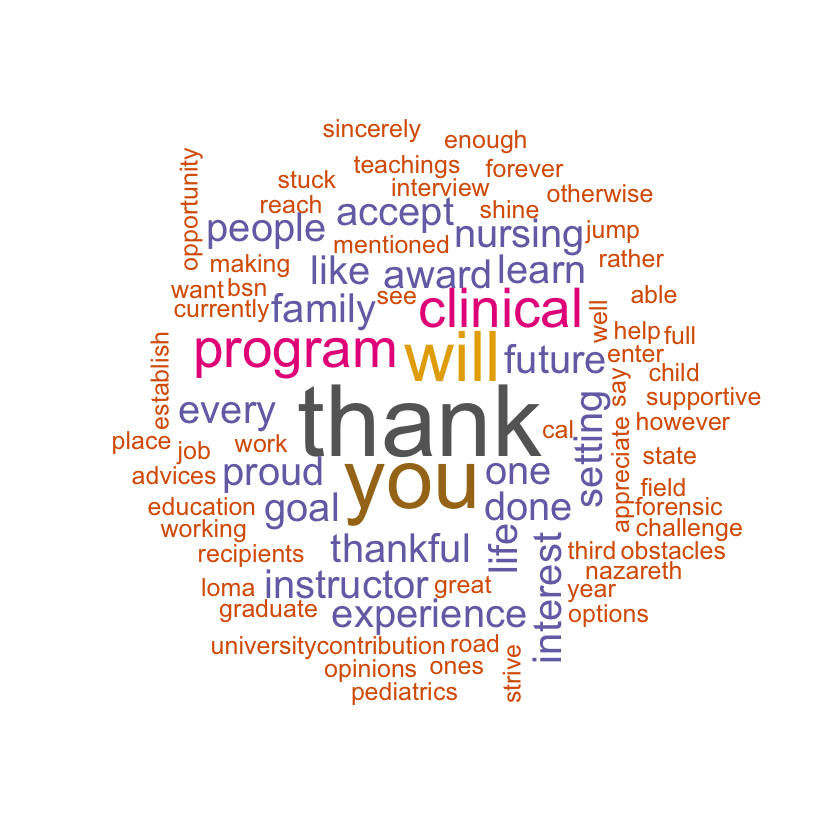

In [65]:
wordcloud(words, min.freq=1, scale=c(5,0.5), colors=brewer.pal(8, "Dark2"),random.color=FALSE, random.order=FALSE, max.words=80)